# Introduction

Basic example of a a pytorch model

# Check install

Load pytorch and do a simple calculation

In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.8315, 0.3177, 0.6759],
        [0.0949, 0.5375, 0.5298],
        [0.8925, 0.7985, 0.1398],
        [0.8825, 0.6480, 0.2416],
        [0.7476, 0.4251, 0.4048]])


# Generate some data

In [2]:
import numpy as np

# Create some data along the line y = 10X - 3
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [10*i - 3 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

# Initialize the model

In [3]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

# Use the model

In [4]:
inputDim = 1 
outputDim = 1
learningRate = 0.01 
epochs = 500

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    print("Cuda is available, enabling for model")
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

Cuda is available, enabling for model


# Train the model

In [5]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 3080.891357421875
epoch 1, loss 254.5054168701172
epoch 2, loss 23.930313110351562
epoch 3, loss 5.087626934051514
epoch 4, loss 3.5156726837158203
epoch 5, loss 3.3528311252593994
epoch 6, loss 3.3053090572357178
epoch 7, loss 3.2675771713256836
epoch 8, loss 3.2310211658477783
epoch 9, loss 3.1949374675750732
epoch 10, loss 3.1592609882354736
epoch 11, loss 3.12397837638855
epoch 12, loss 3.089094877243042
epoch 13, loss 3.054598093032837
epoch 14, loss 3.0204877853393555
epoch 15, loss 2.9867589473724365
epoch 16, loss 2.953409433364868
epoch 17, loss 2.9204261302948
epoch 18, loss 2.88781476020813
epoch 19, loss 2.855567216873169
epoch 20, loss 2.823678970336914
epoch 21, loss 2.792147636413574
epoch 22, loss 2.7609684467315674
epoch 23, loss 2.730135917663574
epoch 24, loss 2.699650526046753
epoch 25, loss 2.6695048809051514
epoch 26, loss 2.639695167541504
epoch 27, loss 2.6102185249328613
epoch 28, loss 2.581069231033325
epoch 29, loss 2.5522468090057373
epoch 30, 

# Test the model

[[-2.7877095]
 [ 7.181719 ]
 [17.151146 ]
 [27.120575 ]
 [37.090004 ]
 [47.05943  ]
 [57.02886  ]
 [66.99828  ]
 [76.96771  ]
 [86.93714  ]
 [96.90657  ]]


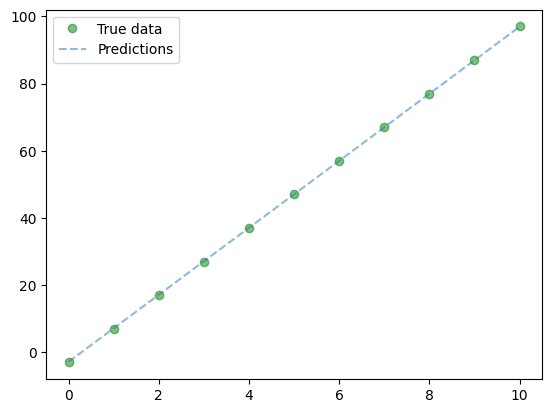

In [6]:
import matplotlib.pyplot as plt

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()